### Import section

In [ ]:
import pandas as pd
import os
from datetime import datetime, timedelta
import warnings
import data_updater as d
import historical_performance as hp
warnings.filterwarnings("ignore")
last_day = "2025-08-25"

### daily data update

In [ ]:
d.scrape_data_updater(last_day)
folder_path = "./Scrapped_data/daily"
d.replace_zero_with_close(folder_path)

done for 1JANATAMF
done for 1STPRIMFMF
done for AAMRANET
done for AAMRATECH
done for ABB1STMF
done for ABBANK
done for ABBLPBOND
done for ACFL
done for ACI
done for ACIFORMULA
done for ACMELAB
done for ACMEPL
done for ACTIVEFINE
done for ADNTEL
done for ADVENT
done for AFCAGRO
done for AFTABAUTO
done for AGNISYSL
done for AGRANINS
done for AIBL1STIMF
Ticker file not found for AIBLPBOND: ./Scrapped_data/daily\AIBLPBOND.csv
done for AIL
done for AL-HAJTEX
done for ALARABANK
done for ALIF
done for ALLTEX
done for AMANFEED
done for AMBEEPHA
done for AMCL(PRAN)
done for ANLIMAYARN
done for ANWARGALV
done for AOL
done for APEXFOODS
done for APEXFOOT
done for APEXSPINN
done for APEXTANRY
done for APOLOISPAT
done for APSCLBOND
done for ARAMIT
done for ARAMITCEM
done for ARGONDENIM
done for ASIAINS
done for ASIAPACINS
done for ASIATICLAB
done for ATCSLGF
done for ATLASBANG
done for AZIZPIPES
done for BANGAS
Ticker file not found for BANKASI1PB: ./Scrapped_data/daily\BANKASI1PB.csv
done for BANK

### Generalizing Date Format

In [4]:

# Folder containing CSV files
folder_path = "./Scrapped_data/daily"

# Define function to fix date format
def fix_date_format(date_str):
    formats = ["%m/%d/%Y", "%Y-%m-%d", "%d-%m-%Y", "%d/%m/%Y"]  # Possible formats
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt).strftime("%m/%d/%Y")
        except ValueError:
            continue
    return None  # Return None if no format matches

# Iterate through CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Assuming date column is named 'date', change accordingly
        if 'date' in df.columns:
            df['date'] = df['date'].astype(str).apply(fix_date_format)
            df.dropna(subset=['date'], inplace=True)  # Remove rows with unfixable dates
        
        # Save the cleaned file
        df.to_csv(file_path, index=False)
        print(f"Fixed date format in: {file}")


Fixed date format in: 00DS30.csv
Fixed date format in: 00DSES.csv
Fixed date format in: 00DSEX.csv
Fixed date format in: 1JANATAMF.csv
Fixed date format in: 1STPRIMFMF.csv
Fixed date format in: AAMRANET.csv
Fixed date format in: AAMRATECH.csv
Fixed date format in: ABB1STMF.csv
Fixed date format in: ABBANK.csv
Fixed date format in: ABBLPBOND.csv
Fixed date format in: ACFL.csv
Fixed date format in: ACI.csv
Fixed date format in: ACIFORMULA.csv
Fixed date format in: ACMELAB.csv
Fixed date format in: ACMEPL.csv
Fixed date format in: ACTIVEFINE.csv
Fixed date format in: ADNTEL.csv
Fixed date format in: ADVENT.csv
Fixed date format in: AFCAGRO.csv
Fixed date format in: AFTABAUTO.csv
Fixed date format in: AGNISYSL.csv
Fixed date format in: AGRANINS.csv
Fixed date format in: AIBL1STIMF.csv
Fixed date format in: AIL.csv
Fixed date format in: AL-HAJTEX.csv
Fixed date format in: ALARABANK.csv
Fixed date format in: ALIF.csv
Fixed date format in: ALLTEX.csv
Fixed date format in: AMANFEED.csv
Fixed d

### Generating ticker lists

In [2]:
folder_path = './Scrapped_data/daily'  # ingestable file location
tickers = [file.split('.')[0] for file in os.listdir(folder_path) if file.endswith('.csv')]

### Filter 1 TP15%, SL8%, Holding Period 4 month (120 days) 

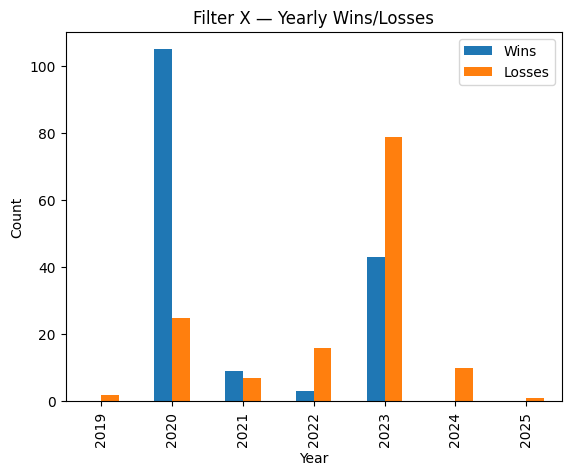

Total take profits = 160
Total stop losses = 140
Overall win-loss ratio = 1.1428571428571428

Yearly Summary:
   Year  Wins  Losses  Win-Loss Ratio
6  2019     0       2        0.000000
0  2020   105      25        4.200000
3  2021     9       7        1.285714
2  2022     3      16        0.187500
1  2023    43      79        0.544304
5  2024     0      10        0.000000
4  2025     0       1        0.000000


In [3]:
def get_previous_non_zero(series, index):
    """Finds the nearest previous non-zero value from a given index."""
    while index >= 0 and series.iloc[index] == 0:
        index -= 1
    return index


for ticker in tickers:
    filepath = folder_path+'/'+ticker+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    df.index = pd.to_datetime(df.index, format="mixed", errors='coerce')
    df['volume'] = df['volume'].replace(',', '', regex=True).astype(float)
    df.index=df.index.date
    rolling_window = 10
    rsi_period = 14

    # Calculating rolling standard deviation RSI of trade
    df['Rolling Std Dev trade'] = df['trade'].rolling(window=10).std()
    delta_std_trade = df['Rolling Std Dev trade'].diff()
    gain_std_trade = delta_std_trade.where(delta_std_trade > 0, 0)
    loss_std_trade = -delta_std_trade.where(delta_std_trade < 0, 0)
    avg_gain_std_trade = gain_std_trade.rolling(window=14, min_periods=1).mean()
    avg_loss_std_trade = loss_std_trade.rolling(window=14, min_periods=1).mean()
    rs_std_trade = avg_gain_std_trade / avg_loss_std_trade
    df['RSI of Rolling Std Dev trade'] = 100 - (100 / (1 + rs_std_trade))

    #RSI
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14, min_periods=1).mean()
    avg_loss = loss.rolling(window=14, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    

    # Check if t-1 close is positive compared to t-2 close
    close_positive = df.iloc[-1]['close'] > df.iloc[-2]['close']
     # Calculating low differences
    idx1 = get_previous_non_zero(df['low'], -1)  # Start from the last value
    idx2 = get_previous_non_zero(df['low'], idx1 - 1)
    low_diff1 = abs((df['low'].iloc[idx1] - df['low'].iloc[idx2]) / df['low'].iloc[idx2])

    # Adjusted calculation for low_diff2
    idx3 = get_previous_non_zero(df['low'], idx2 - 1)
    low_diff2 = abs((df['low'].iloc[idx2] - df['low'].iloc[idx3]) / df['low'].iloc[idx3])
    
    if low_diff2 <= 0.001 and close_positive and df['RSI of Rolling Std Dev trade'].iloc[-1] > 98 and df['RSI'].iloc[-1] > 98: 
        print(f"{ticker} is available for today based on {last_day}")
        
hp.Filter1_ratio()

### Filter 2 TP 40% SL 15% AVG HOLDING 6 Month 

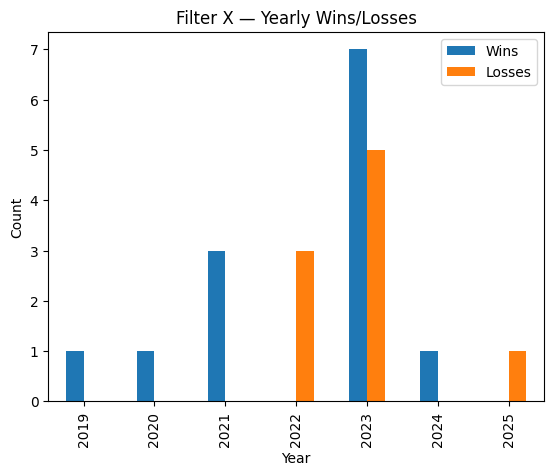

Total take profits = 13
Total stop losses = 9
Overall win-loss ratio = 1.4444444444444444

Yearly Summary:
   Year  Wins  Losses  Win-Loss Ratio
6  2019     1       0             1.0
5  2020     1       0             1.0
4  2021     3       0             3.0
1  2022     0       3             0.0
0  2023     7       5             1.4
2  2024     1       0             1.0
3  2025     0       1             0.0


In [4]:
for ticker in tickers:
    filepath = folder_path + '/' + ticker + '.csv'
    df = pd.read_csv(filepath, index_col=0)
    df.index = pd.to_datetime(df.index, format="mixed", errors='coerce')
    df['volume'] = df['volume'].replace(',', '', regex=True).astype(float)
    df.index = df.index.date  # Convert index to date
    
    df['vol_trade'] = df['volume']/df['trade']
    df['price_sma'] = df['close'].rolling(window=10).mean()
    df['price_ema'] = df['close'].ewm(span=10, min_periods=0, adjust=False).mean()
    df['trade_sma'] = df['trade'].rolling(window=30).mean()
    df['trade_ema'] = df['trade'].ewm(span=20, min_periods=0, adjust=False).mean()
    # Calculate the 10-day rolling standard deviation of the close price
    df['Rolling Std Dev'] = df['close'].rolling(window=10).std()

    # Calculate RSI (Relative Strength Index) of Close Price with a 14-day window
    window_length = 14
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
    avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Calculate RSI of the Rolling Standard Deviation with a 14-day window
    delta_std = df['Rolling Std Dev'].diff()
    gain_std = delta_std.where(delta_std > 0, 0)
    loss_std = -delta_std.where(delta_std < 0, 0)
    avg_gain_std = gain_std.rolling(window=window_length, min_periods=1).mean()
    avg_loss_std = loss_std.rolling(window=window_length, min_periods=1).mean()
    rs_std = avg_gain_std / avg_loss_std
    df['RSI of Rolling Std Dev'] = 100 - (100 / (1 + rs_std))

    # Calculate RSI of vol_trade
    df['Rolling Std Dev vol_trade'] = df['vol_trade'].rolling(window=10).std()
    delta_vol_trade = df['Rolling Std Dev vol_trade'].diff()
    gain_vol_trade = delta_vol_trade.where(delta_vol_trade > 0, 0)
    loss_vol_trade = -delta_vol_trade.where(delta_vol_trade < 0, 0)
    avg_gain_vol_trade = gain_vol_trade.rolling(window=window_length, min_periods=1).mean()
    avg_loss_vol_trade = loss_vol_trade.rolling(window=window_length, min_periods=1).mean()
    rs_vol_trade = avg_gain_vol_trade / avg_loss_vol_trade
    df['RSI of Std vol_trade'] = 100 - (100 / (1 + rs_vol_trade))


    # MACD Parameters
    short_window = 20  # Short EMA period
    long_window = 40   # Long EMA period
    signal_window = 15 # Signal line EMA period
    df['EMA_20'] = df['close'].ewm(span=short_window, adjust=False).mean()
    df['EMA_40'] = df['close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = df['EMA_20'] - df['EMA_40']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

    
    
    low_diff_1 = abs(df.iloc[-1]['low'] - df.iloc[-2]['low'])
    low_diff_criteria = (low_diff_1 / df.iloc[-2]['low'] <= 0.02)
    close_positive = df.iloc[-1]['close'] > df.iloc[-2]['close']
    signal_above_macd_15 = all(df['Signal_Line'].iloc[-15:-1] > df['MACD'].iloc[-15:-1])
    
    
    if (
            low_diff_criteria and signal_above_macd_15 and  close_positive and
            (df['Signal_Line'].iloc[-1] > df["MACD"].iloc[-1]) and (df["RSI"].iloc[-1] < 30) 
            and df["open"].iloc[-1]==df["low"].iloc[-1] and df["trade_ema"].iloc[-1]>df["trade_sma"].iloc[-1]
            and df['RSI of Rolling Std Dev'].iloc[-1]<30 and df['RSI of Std vol_trade'].iloc[-1]<70
        ): 
            print(f"{ticker} gave a signal on {last_day}")
            

hp.Filter2_ratio()

### Fallen Angel 3 TP 15% SL 8% Avg Holding period 2 months 

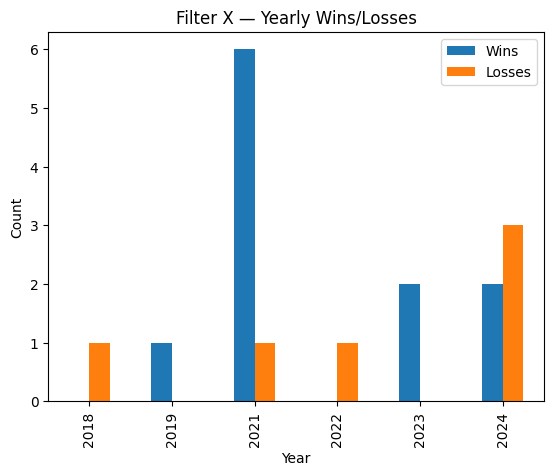

Total take profits = 11
Total stop losses = 6
Overall win-loss ratio = 1.8333333333333333

Yearly Summary:
   Year  Wins  Losses  Win-Loss Ratio
5  2018     0       1        0.000000
3  2019     1       0        1.000000
2  2021     6       1        6.000000
4  2022     0       1        0.000000
0  2023     2       0        2.000000
1  2024     2       3        0.666667


In [5]:
for ticker in tickers:
    filepath = folder_path + '/' + ticker + '.csv'
    df = pd.read_csv(filepath, index_col=0)
    df.index = pd.to_datetime(df.index, format="mixed", errors='coerce')
    df['volume'] = df['volume'].replace(',', '', regex=True).astype(float)
    df.index = df.index.date  # Convert index to date
    
    df['vol_trade'] = df['volume']/df['trade']
    df['price_sma'] = df['close'].rolling(window=10).mean()
    df['price_ema'] = df['close'].ewm(span=10, min_periods=0, adjust=False).mean()
    df['trade_sma'] = df['trade'].rolling(window=30).mean()
    df['trade_ema'] = df['trade'].ewm(span=20, min_periods=0, adjust=False).mean()
    # Calculate the 10-day rolling standard deviation of the close price
    df['Rolling Std Dev'] = df['close'].rolling(window=10).std()

    # Calculate RSI (Relative Strength Index) of Close Price with a 14-day window
    window_length = 14
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
    avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Calculate RSI of the Rolling Standard Deviation with a 14-day window
    delta_std = df['Rolling Std Dev'].diff()
    gain_std = delta_std.where(delta_std > 0, 0)
    loss_std = -delta_std.where(delta_std < 0, 0)
    avg_gain_std = gain_std.rolling(window=window_length, min_periods=1).mean()
    avg_loss_std = loss_std.rolling(window=window_length, min_periods=1).mean()
    rs_std = avg_gain_std / avg_loss_std
    df['RSI of Rolling Std Dev'] = 100 - (100 / (1 + rs_std))

    # Calculate RSI of vol_trade
    df['Rolling Std Dev vol_trade'] = df['vol_trade'].rolling(window=10).std()
    delta_vol_trade = df['Rolling Std Dev vol_trade'].diff()
    gain_vol_trade = delta_vol_trade.where(delta_vol_trade > 0, 0)
    loss_vol_trade = -delta_vol_trade.where(delta_vol_trade < 0, 0)
    avg_gain_vol_trade = gain_vol_trade.rolling(window=window_length, min_periods=1).mean()
    avg_loss_vol_trade = loss_vol_trade.rolling(window=window_length, min_periods=1).mean()
    rs_vol_trade = avg_gain_vol_trade / avg_loss_vol_trade
    df['RSI of Std vol_trade'] = 100 - (100 / (1 + rs_vol_trade))


    # MACD Parameters
    short_window = 20  # Short EMA period
    long_window = 40   # Long EMA period
    signal_window = 15 # Signal line EMA period
    df['EMA_20'] = df['close'].ewm(span=short_window, adjust=False).mean()
    df['EMA_40'] = df['close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = df['EMA_20'] - df['EMA_40']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

    
    
    low_diff_1 = abs(df.iloc[-1]['low'] - df.iloc[-2]['low'])
    low_diff_criteria = (low_diff_1 / df.iloc[-2]['low'] <= 0.02)
    close_positive = df.iloc[-1]['close'] > df.iloc[-2]['close']
    signal_above_macd_15 = all(df['Signal_Line'].iloc[-15:-1] > df['MACD'].iloc[-15:-1])
    
    
    if (
            low_diff_criteria and signal_above_macd_15 and  close_positive and
            (df['Signal_Line'].iloc[-1] > df["MACD"].iloc[-1]) and (df["RSI"].iloc[-1] < 30) 
            and df["open"].iloc[-1]==df["low"].iloc[-1] and df["trade_ema"].iloc[-1]>df["trade_sma"].iloc[-1]
            and df['RSI of Rolling Std Dev'].iloc[-1]<70 and df['RSI of Std vol_trade'].iloc[-1]<30
        ): 
            print(f"{ticker} gave a signal on {last_day}")
            

hp.Filter3_ratio()